### 核心语言

In [1]:
myPrimeSum2 = Plus @@ Prime /@ Range[PrimePi[#]] &;

（@@:Apply、/@:Map、#:形参、&:纯函数），是一些 Mathematica 内建函数的简写形式,完整形式如下:

In [5]:
myPrimeSum2 =
Function[n,
    Apply[Plus,
        Map[Prime,
            Range[PrimePi[n]]

        ]
    ]  
];

C 语言是命令式的，或者说面向过程的；而 Mathematica 是**函数式**的。

Mathematica 是用 C 语言编写,Macsyma 是用 MAC Lisp 实现的;Lisp 的含义是"表处理",在 Mathematica 中，我们可以用 TreeForm 来获得一个表达式的语法树。

Equal[|                                        , x]
      Times[|                   , |           ]
            Plus[a, |          ]  Power[z, -1]
                    Power[b, n]
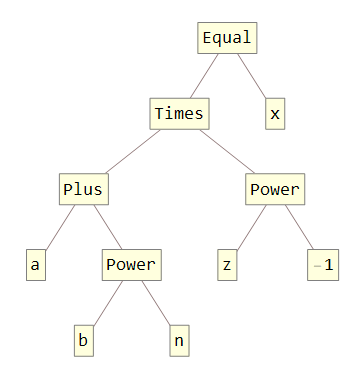

In [6]:
TreeForm[(a + b^n)/z == x]

这样的一棵树按照 Lisp 的写法则是：$(= (* (+ a (expt$ $b$ $n)) (expt$ $z$ $-1)) x)$,可以用 FullForm 来获得一个表达式在 Mathematica 内部的完整形式:

In [7]:
FullForm[(a + b^n)/z == x]

Equal[Times[Plus[a, Power[b, n]], Power[z, -1]], x]

$mma 和 Lisp 的区别仅在于，Lisp 中的函数表示为(函数名　参数1　参数2)$,<br/>$mma 中的函数表示为函数名[参数1, 参数2]$

### mma中的表达式(expression) 
<br/>--Mathematica 第一原理：万物皆表（达式）。

1. 原子对象是表达式；
2. 若 F、X1、X2、...、Xn 是表达式，则 F[X1, X2,..., Xn] 也是表达式。

{Plus[a, b], Plus[a, Times[-1, b]], Times[a, b], Times[a, Power[b, -1]], Power[a, b], 
 
>   Equal[a, b], Unequal[a, b], Less[a, b], LessEqual[a, b], Greater[a, b], 
 
>   GreaterEqual[a, b], And[a, b], Or[a, b]}
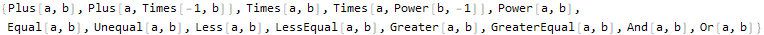

In [8]:
FullForm /@ {a + b, a - b, a*b, a/b, a^b, a == b, a != b, a < b, 
  a <= b, a > b, a >= b, a && b, a || b} 

In [9]:
ForAll[\[Epsilon], \[Epsilon] > 0, 
  Exists[\[Delta], \[Delta] > 0, 
   ForAll[x, Abs[x - Subscript[x, 0]] < \[Delta], 
    Abs[f[x] - f[Subscript[x, 0]]] < \[Epsilon]]]] // TraditionalForm

FormBox[RowBox[{SubscriptBox["∀", RowBox[{"ϵ", ",", RowBox[{"ϵ", ">", "0"}]}]], 

 
>        RowBox[{SubscriptBox["∃", RowBox[{"δ", ",", RowBox[{"δ", ">", "0"}]}]], 

 
>          RowBox[{SubscriptBox["∀", RowBox[{"x", ",", 

 
>               RowBox[{TemplateBox[List[RowBox[List["x", "-", 

 
>                     SubscriptBox["x", "0"]]]], "Abs"], "<", "δ"}]}]], 

 
>            RowBox[{TemplateBox[List[RowBox[List[RowBox[List["f", "(", "x", ")"]], "-",\
 
>    
               RowBox[List["f", "(", SubscriptBox["x", "0"], ")"]]]]], "Abs"],\
 
>    "<", 
           "ϵ"}]}]}]}], TraditionalForm]

Lisp 并不擅长计算,Mathematica 的计算思想来自于其它函数式语言，如 Haskell、OCaml 等等。

In [10]:
Trace[(#2 - #1) & @@ (Integrate[Sin[x]^2, x] /. {x -> #} & /@ {0, 2 Pi})]

{}

1. 从待计算对象中识别一些可化简的模式(模式匹配);
2. 将识别出的模式用已知的规则进行化简(规则带入);
--Mathematica第二原理：**计算即重写**。

Lisp 没有重写系统、Haskell、OCaml 不符合万物皆表，但是人们还是将它们归为一类，称为函数式语言。这是因为这些语言拥有一个共同的原理，那就是把函数视为最基本的、可操作的对象。

"代码即数据（Code-as-Data）"被称为 Lisp 的哲学:可以制止解释器求值,操作后,组合成表L后可强制求值;<br/>
在 Haskell 中，每种类型可以视为一个集合,于是任何二元函数$ f: X\times Y\rightarrow Z $都可视为一个从$ X 到 Z^Y$ 的一元函数，记为$f: X\rightarrow(Y\rightarrow Z)$，这种对应被称为函数的currying。<br/>

在 mma 中既可以实现"代码即数据"这种 Lisp 哲学，也可以实现复合和 currying 等函数上的运算<br/>
--第零原理：重要的是函数，而非变量。

以上就是 Mathematica 核心语言的主要内容：表达式、重写系统、泛函编程和模块化。这也将是我们在本课程中学到的东西。

* 表达式与表

给定一个表达式$ F[X1, X2, ..., Xn]，我们称 F$ 是它的"头"。

In [11]:
Head /@ {1, 1/2, True, "number", a + b, a - b, a*b, 
  a/b, (f + g)[x1, x2, x3]}

{Integer, Rational, Symbol, String, Plus, Plus, Times, Times, f + g}

$运算符 /@ 的全名叫 Map，是最常用的泛函运算之一。$<br/>用它可以方便地测试一个函数在一组变量上的作用效果，而不必把这个函数名写很多次。

In [13]:
h /@ k[x1, x2, x3]

k[h[x1], h[x2], h[x3]]

对于原子表达式：符号的头总是 Symbol；数字的头则依赖于它的类型，结果可以是 Integer、Rational、Real 和 Complex；字符串的头总是 String；图片的头是 Image 等等。<br/>
利用这个性质，我们可以判断一个表达式是否是原子。

In [14]:
myAtomQ = 
  Function[ex, 
   MemberQ[{Symbol, Integer, Rational, Reals, Complex, String, Image},
     Head[ex]]];
     (*类似内建函数AtomQ*)

Mathematica 引入表（List）这个概念，然后规定所有的无头表达式的头都是 List。

$表达式 X1, X2,..., Xn 构成的表记为 \{X1, X2,..., Xn\}。$

$List 本身也是 Mathematica 的一个内部函数，它的作用是将输入的表达式序列做成一个表。$

In [ ]:
List[1, 2, 3]
(* 如果把 List 视为类（class），那么 List 函数就是这个类的构造函数（constructor）。 *)

对于表达式$ F[X1, X2, ..., Xn]$,其头之外的部分可以用 $List[X1, X2,..., Xn] $表示,此操作可以看成将原表达式的头 $F$ 换成了系统内建符号$ List$。

$换头术也是 Mathematica 中最常用的泛函运算之一，它的全名叫 Apply，简写形式为 @@。$

In [52]:
Apply[g, h[x1, x2, x3]]
g @@ h[x1, x2, x3]

g[x1, x2, x3]
g[x1, x2, x3]

表这种表达式还有一种变体，叫做序列（Sequence）。序列可以认为是没有两边花括号（"{"和"}"）的表,更原始;

In [54]:
ex = h[1, 2, 3] 
seq = Sequence @@ ex;
lst = List @@ ex;
f[seq]
f[lst]
f @@ lst
f[seq, lst, 4, 5, 6]
(* 即如果不想要这层花括号，就要用 Sequence 换头 *)

h[1, 2, 3]
f[1, 2, 3]
f[{1, 2, 3}]
f[1, 2, 3]
f[1, 2, 3, {1, 2, 3}, 4, 5, 6]

$除了用 Head 和 Apply 以外,mma提供了另一种访问复合表达式内部表达式的方法，即系统内建函数 Part，简写形式为 [[...]]$<br/>
$expr[[i]] or Part[expr,i]$给出表达式第$i$个元素;<br/>
$expr[[i,j,...]] or Part[expr,i,j,...]$等价于$expr[[i]][[j]][[...]]$;<br/>


In [66]:
ex = f[x1, x2, x3];
{ex[[0]], ex[[1]], ex[[2]], ex[[3]]}

{f, x1, x2, x3}

In [64]:
ex = f[a, g[b, c], h[d, k[e, i], j]];
ex[[3]][[2]][[2]]

i

In [69]:
ex = f[a, g[b, c], h[d, k[e, i], j]];
ex[[3, 2, 2]]

i

$Part$ 还有很多其它的变体，详见帮助系统。

In [ ]:
ex[[-1, -2, -1]]
ex[[{2, 3}]]
ex[[1 ;; 2]]
ex[[1 ;; 3 ;; 2]]

最常用的一些$ Part$ 有属于它们自己的内建函数：

In [71]:
Function[op, op[f[x1, x2, x3, x4]]] /@ {First, Last, Rest, Most}
Take[f[x1, x2, x3, x4], {2, 3}]
Drop[f[x1, x2, x3, x4], {2, 3}]

{x1, x4, f[x2, x3, x4], f[x1, x2, x3]}
f[x2, x3]
f[x1, x4]

对于给定的表达式，有两个值很重要，即它的长度和深度：

In [74]:
Length[f[g[x1, h[x2, x3]], x4]]
Depth[f[g[x1, h[x2, x3]], x4]]
(* Depth会加1 *)

2
4

* 表的构造

In [76]:
Range[10]
Range[2, 10]
Range[2, 10, 3]

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
{2, 3, 4, 5, 6, 7, 8, 9, 10}
{2, 5, 8}

{3, 7, 13, 21, 31, 43, 57, 73, 91, 111}
0   1   0   0   0

0   0   1   0   0

0   0   0   1   0

0   0   0   0   1

t   0   0   0   0
克罗内克尔函数δ
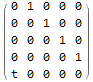

In [83]:
Table[i^2 + i + 1, {i, 10}]
Table[KroneckerDelta[i, j - 1] + t KroneckerDelta[i, j + 4], {i, 
   5}, {j, 5}] //MatrixForm
    克罗内克尔函数\[Delta]

In [86]:
Array[#^2 + # + 1 &, 10]
#^2 + # + 1 & /@ Range[10]

{3, 7, 13, 21, 31, 43, 57, 73, 91, 111}
{3, 7, 13, 21, 31, 43, 57, 73, 91, 111}

In [ ]:
Array[f, 5, 2, h]

{{1, 1, 1}, {1, 1, 2}, {1, 1, 3}, {1, 2, 1}, {1, 2, 2}, {1, 2, 3}, {1, 3, 1}, {1, 3, 2}, 
 
>   {1, 3, 3}, {2, 1, 1}, {2, 1, 2}, {2, 1, 3}, {2, 2, 1}, {2, 2, 2}, {2, 2, 3}, 
 
>   {2, 3, 1}, {2, 3, 2}, {2, 3, 3}, {3, 1, 1}, {3, 1, 2}, {3, 1, 3}, {3, 2, 1}, 
 
>   {3, 2, 2}, {3, 2, 3}, {3, 3, 1}, {3, 3, 2}, {3, 3, 3}}
f[1, 1]   f[1, 2]

f[2, 1]   f[2, 2]

f[3, 1]   f[3, 2]
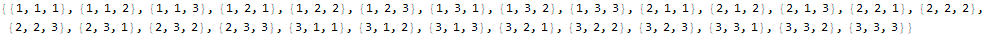
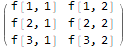

In [88]:
Tuples[Range[3], 3]
Outer[f, Range[3], Range[2]] // MatrixForm

* 查询和搜索：

In [90]:
ex = f[x1, x2, x3, x4];
Function[i, MemberQ[ex, i]] /@ {f, x1, x2, x3, x4, x5, x6}
(* MemberQ[list,form]通常只测试层次1 *)
Function[i, FreeQ[ex, i]] /@ {f, x1, x2, x3, x4, x5, x6}
(* 从层次0开始 *)

{False, True, True, True, True, False, False}
{False, False, False, False, False, True, True}

In [1]:
MemberQ[ex, f, Heads -> True]

False

In [2]:
FreeQ[{{1, 1, 3, 0}, {2, 1, 2, 2}}, 0]
FreeQ[{{1, 1, 3, 0}, {2, 1, 2, 2}}, 0, 2]

False
False

In [4]:
euler = (a + b^n)/n == x;
{Count[euler, n], Count[euler, n, Infinity]}

{0, 2}

In [6]:
Position[euler, n]
Function[level, Position[euler, n, level]] /@ {0, 1, 2, 3, 4}
Function[level, Position[euler, n, level]] /@ {{3}, {4}}

{{1, 1, 2, 2}, {1, 2, 1}}
{{}, {}, {}, {{1, 2, 1}}, {{1, 1, 2, 2}, {1, 2, 1}}}
{{{1, 2, 1}}, {{1, 1, 2, 2}}}

In [9]:
Select[Prime /@ Range[10], OddQ]
Select[Prime /@ Range[10], Mod[#, 4] == 1 &]
(* Select[list,crit] ,list无需List的头部,Select[crit][list] 等价于 Select[list,crit]*)

{3, 5, 7, 11, 13, 17, 19, 23, 29}
{5, 13, 17, 29}

* 添加、删除和修改:

In [11]:
ex = f[a, b, c]

{Prepend[ex, z], Append[ex, d], Insert[ex, i, 2], Insert[ex, i, -2]}

f[a, b, c]
{f[z, a, b, c], f[a, b, c, d], f[a, i, b, c], f[a, b, i, c]}

In [13]:
{PrependTo[ex, z], AppendTo[ex, d]}

{f[z, a, b, c], f[z, a, b, c, d]}

In [14]:
Delete[ex, 1]
Delete[ex, {{1}, {-1}}]

f[a, b, c, d]
f[a, b, c]

In [16]:
{ReplacePart[ex, 1 -> x], ex}

{f[x, a, b, c, d], f[z, a, b, c, d]}

In [17]:
Reverse[ex]
RotateLeft[ex, 2]
RotateRight[ex, -1]

f[d, c, b, a, z]
f[b, c, d, z, a]
f[a, b, c, d, z]

In [20]:
ex[[1]] = y;
ex

f[y, a, b, c, d]

* 头部一样的表达式之间的集合运算：

In [22]:
Join[f[x1, x2], f[x1, x3]]

f[x1, x2, x1, x3]

In [23]:
Union[f[x1, x2], f[x1, x3]]
Union[{1, 2, 2, 2, 3, 3, 1, 4, 4, 2, 5, 6, 7, 0}]

f[x1, x2, x3]
{0, 1, 2, 3, 4, 5, 6, 7}

In [25]:
Intersection[f[x1, x2, x3], f[x1, x2, x4]]
Complement[f[x1, x2, x3], f[x1, x2, x4]]


f[x1, x2]
f[x3]

$Complement[e_{all},e_1,e_2,...] 给出 e_{all} 中不属于任何 e_i 的元素. $

* 排序：

In [27]:
list = Array[RandomInteger[10] &, {20, 2}]

{{5, 8}, {8, 6}, {4, 7}, {2, 6}, {3, 5}, {8, 1}, {9, 5}, {2, 9}, {10, 2}, {1, 9}, 
 
>   {3, 7}, {4, 5}, {8, 0}, {2, 6}, {8, 0}, {9, 7}, {7, 8}, {8, 9}, {3, 2}, {10, 7}}

In [28]:
Sort[list]

{{1, 9}, {2, 6}, {2, 6}, {2, 9}, {3, 2}, {3, 5}, {3, 7}, {4, 5}, {4, 7}, {5, 8}, {7, 8}, 
 
>   {8, 0}, {8, 0}, {8, 1}, {8, 6}, {8, 9}, {9, 5}, {9, 7}, {10, 2}, {10, 7}}

In [29]:
Sort[list, Function[{list1, list2}, list1[[1]] < list2[[1]]]]
Sort[list, #1[[1]] < #2[[1]] &]

{{1, 9}, {2, 6}, {2, 9}, {2, 6}, {3, 2}, {3, 7}, {3, 5}, {4, 5}, {4, 7}, {5, 8}, {7, 8}, 
 
>   {8, 9}, {8, 0}, {8, 0}, {8, 1}, {8, 6}, {9, 7}, {9, 5}, {10, 7}, {10, 2}}
{{1, 9}, {2, 6}, {2, 9}, {2, 6}, {3, 2}, {3, 7}, {3, 5}, {4, 5}, {4, 7}, {5, 8}, {7, 8}, 
 
>   {8, 9}, {8, 0}, {8, 0}, {8, 1}, {8, 6}, {9, 7}, {9, 5}, {10, 7}, {10, 2}}

In [31]:
Sort[list, #1[[1]] <= #2[[1]] &]

{{1, 9}, {2, 6}, {2, 9}, {2, 6}, {3, 5}, {3, 7}, {3, 2}, {4, 7}, {4, 5}, {5, 8}, {7, 8}, 
 
>   {8, 6}, {8, 1}, {8, 0}, {8, 0}, {8, 9}, {9, 5}, {9, 7}, {10, 2}, {10, 7}}

In [32]:
Sort[list, (#1[[1]] < #2[[
      1]]) || (#1[[1]] == #2[[1]] && #1[[2]] > #2[[2]]) &]

{{1, 9}, {2, 9}, {2, 6}, {2, 6}, {3, 7}, {3, 5}, {3, 2}, {4, 7}, {4, 5}, {5, 8}, {7, 8}, 
 
>   {8, 9}, {8, 6}, {8, 1}, {8, 0}, {8, 0}, {9, 7}, {9, 5}, {10, 7}, {10, 2}}

In [33]:
list = {2, 3, 5, 1, 4};
Sort[list]
Ordering[list]
(* Ordering给出 Sort[list] 顺序排列的位置 *)
list[[Ordering[list]]]

{1, 2, 3, 4, 5}
{4, 1, 2, 5, 3}
{1, 2, 3, 4, 5}

$eg.找出不大于 n 的所有无平方因子的自然数。$<br/>
--一种常用的提速技巧。

In [37]:
(* 方法一：AppendTo *)
solution1 =
  Function[n, L = {}; 
   Function[i, If[SquareFreeQ[i], AppendTo[L, i]]] /@ Range[n]; L];

(* 方法二：PrependTo *)
solution2 =
  Function[n, L = {}; 
   Function[i, If[SquareFreeQ[i], PrependTo[L, i]]] /@ Range[n]; 
   Reverse[L]];

(* 方法三：嵌套表+Flatten *)
solution3 =
  Function[n, L = {}; 
   Function[i, If[SquareFreeQ[i], L = {L, i}]] /@ Range[n]; 
   Flatten[L]];

(* 方法四：收获与播种 *)
solution4 =
  Function[n, 
   Reap[Function[i, If[SquareFreeQ[i], Sow[i], 0]] /@ Range[n]][[2, 
    1]]];

Timing[#[20000]][[1]] & /@ {solution1, solution2, solution3, 
  solution4}


{0.28125, 0.375, 0.0625, 0.046875}

$
eg2.求 Pell 方程 x^2-2y^2=1 的满足 1\leq y \leq n 的解。$

In [1]:
(* 如果搜索结果本身也含有表的结构，嵌套表+Flatten 就会破坏结果的内部结构。 *)
(* 这时候我们可以用下面的技巧将结果的内部结构保护起来。 *)
(* 收获与播种法没有这样的问题。 *)


(* 方法一：嵌套表+Flatten *)
solution5 = 
  Function[n, L = {}; 
   Do[If[IntegerQ[x = Sqrt[1 + 2 y^2]], L = {L, list[x, y]}], {y, n}];
    Flatten[L] /. {list -> List}];

(* 方法二：收获与播种 *)
solution6 = 
  Function[n, 
   Reap[Do[If[IntegerQ[x = Sqrt[1 + 2 y^2]], Sow[{x, y}]], {y, n}]][[
    2, 1]]];

Timing[#[20000]] & /@ {solution5, solution6}

{{0.1875, {{3, 2}, {17, 12}, {99, 70}, {577, 408}, {3363, 2378}, {19601, 13860}}}, 
 
>   {0.171875, {{3, 2}, {17, 12}, {99, 70}, {577, 408}, {3363, 2378}, {19601, 13860}}}}